<a href="https://colab.research.google.com/github/shrutibalan4591/NLP/blob/main/ducument_clustering_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Import Libraries**

In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=f24d988828404b86aeb153942abf33adb3ebeae5c057d9c050d2f983389dc56d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

# **2.Scraping data and Loading them**

We shall use the content of some random articles, say: Data Science, Teaching, Medicine, Buildings, Cricket etc.


In [ ]:
articles=['Data Science', 'Teaching', 'Medicine', 'Buildings', 'Cricket']

# The content of each article will be stored in a list while the title of each article is stored in another variable.
wlist = []
title = []

for a in articles:
   print("loading content: ",a)
   wlist.append(wikipedia.page(a).content)
   title.append(a)

loading content:  Data Science
loading content:  Teaching
loading content:  Medicine
loading content:  Buildings
loading content:  Cricket


In [ ]:
wlist

['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of informa

# **3.Representation of articles as Vectors**

We are going to use tf-idf method for this.
Each row of a variable X will be a vector representation of an article.

In [ ]:
vector = TfidfVectorizer(stop_words={'english'}) # We remove the stopword prior to vectorizing
X = vector.fit_transform(wlist)

In [ ]:
print(vector.get_feature_names())
print(X.shape)

['000', '01', '02', '10', '100', '105', '1088', '10th', '11', '11th', '12', '12d', '12th', '13', '145', '1450', '14th', '15', '1500', '1546', '1550', '1553', '1597', '1598', '15th', '16', '160', '1600', '1611', '1624', '1640', '1660', '1664', '1676', '1697', '16th', '17', '1707', '1708', '1741', '1744', '1745', '1748', '1760', '1760s', '1761', '1776', '1787', '1788', '17th', '18', '182', '1839', '1844', '1846', '1854', '1858', '1859', '1862', '1865', '1868', '1874', '1876', '1880', '1882', '1884', '1888', '1889', '1890', '1890s', '1892', '18th', '19', '190', '1900', '1907', '1908', '1909', '1910', '1928', '1930', '1932', '1934', '1948', '1952', '1958', '1962', '1963', '1965', '1969', '1970', '1971', '1973', '1974', '1975', '1976', '1982', '1985', '1989', '1990s', '1992', '1996', '1997', '1998', '19th', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2030', '20th

In [ ]:
print(X[0,])

  (0, 3749)	0.006517020602987381
  (0, 3446)	0.007705213944982317
  (0, 2369)	0.013676699522932573
  (0, 4457)	0.013676699522932573
  (0, 3325)	0.009159445066320793
  (0, 3327)	0.011034275059599159
  (0, 4163)	0.006517020602987381
  (0, 1016)	0.011034275059599159
  (0, 1006)	0.009159445066320793
  (0, 3740)	0.011034275059599159
  (0, 3742)	0.013676699522932573
  (0, 1382)	0.013676699522932573
  (0, 4582)	0.009159445066320793
  (0, 2083)	0.007705213944982317
  (0, 4474)	0.022068550119198317
  (0, 925)	0.013676699522932573
  (0, 4422)	0.013676699522932573
  (0, 4799)	0.013676699522932573
  (0, 4398)	0.009159445066320793
  (0, 499)	0.013676699522932573
  (0, 3090)	0.009159445066320793
  (0, 571)	0.009159445066320793
  (0, 4787)	0.011034275059599159
  (0, 2587)	0.011034275059599159
  (0, 895)	0.007705213944982317
  :	:
  (0, 714)	0.015410427889964634
  (0, 211)	0.007705213944982317
  (0, 215)	0.027353399045865145
  (0, 409)	0.007705213944982317
  (0, 4739)	0.013676699522932573
  (0, 4333)	

# **4.K-means Clustering**

* **4.1 First we decide the number of clusters using the elbow method.**

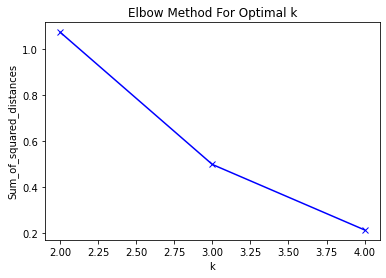

In [ ]:
Sum_of_squared_distances = []
K = range(2, 5)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

# Plotting   
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* **4.2 Clustering**

  A dent appears for k=3. We will cluster into 3 groups.

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

          title  cluster
1      Teaching        0
2      Medicine        0
4       Cricket        0
0  Data Science        1
3     Buildings        2


# **5.Evaluate results**

Cluster: 0
Titles
 Teaching
 Medicine
  Cricket


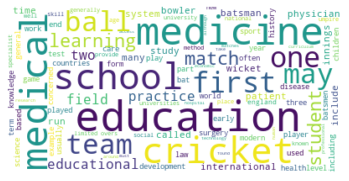

dict_keys(['education', 'medicine', 'medical', 'cricket', 'school', 'one', 'first', 'team', 'ball', 'may', 'learning', 'student', 'match', 'educational', 'practice', 'two', 'field', 'international', 'patient', 'run', 'include', 'batsman', 'many', 'study', 'system', 'physician', 'called', 'wicket', 'innings', 'time', 'bowler', 'development', 'science', 'form', 'year', 'modern', 'health', 'game', 'countries', 'player', 'played', 'disease', 'bat', 'knowledge', 'including', 'level', 'often', 'surgery', 'general', 'example', 'play', 'end', 'care', 'test', 'work', 'usually', 'term', 'history', 'children', 'three', 'world', 'part', 'sport', 'batsmen', 'based', 'used', 'law', 'early', 'concerned', 'england', 'university', 'new', 'method', 'skill', 'specialist', 'umpire', 'limited overs', 'social', 'generally', 'place', 'age', 'well', 'universities', 'provide', 'known', 'national', 'technology', 'access', 'hospital', 'matches', 'research', 'take', 'around', 'human', 'curriculum', 'although', 'p

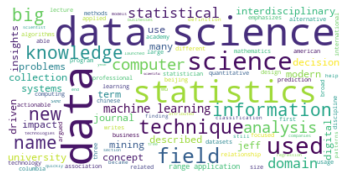

dict_keys(['data', 'data science', 'statistics', 'science', 'used', 'field', 'technique', 'knowledge', 'big', 'information', 'new', 'name', 'analysis', 'computer', 'domain', 'statistical', 'machine learning', 'interdisciplinary', 'systems', 'insights', 'mining', 'concept', 'many', 'driven', 'impact', 'problems', 'digital', 'university', 'described', 'use', 'modern', 'jeff', 'term', 'collection', 'journal', 'decision', 'range application', 'methods', 'algorithms', 'actionable', 'broad', 'related', 'learning', 'mathematics', 'different', 'technology', 'focused', 'large', 'see', 'design', 'business', 'statistician', 'able', 'american', 'association', 'three', 'professional', 'relationship', 'argued', 'writes', 'emphasizes', 'quantitative', 'prediction', 'columbia', 'size', 'datasets', 'computing', 'program', 'applied', 'usage', 'lecture', 'chinese', 'academy', 'beijing', 'wu', 'first', 'alternative', 'discipline', 'international', 'classification', 'became', 'definition', 'still', 'help',

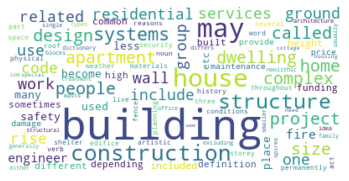

dict_keys(['building', 'may', 'house', 'construction', 'structure', 'systems', 'design', 'called', 'dwelling', 'apartment', 'people', 'home', 'size', 'complex', 'project', 'one', 'ground', 'work', 'wall', 'rise', 'residential', 'use', 'include', 'group', 'related', 'code', 'services', 'engineer', 'fire', 'less', 'place', 'safety', 'become', 'many', 'used', 'included', 'height', 'depending', 'definition', 'high', 'common', 'built', 'different', 'sometimes', 'etc', 'funding', 'provide', 'price', 'maintenance', 'damage', 'edifice', 'roof', 'permanently', 'throughout', 'history', 'materials', 'weather', 'conditions', 'reasons', 'several', 'shelter', 'security', 'space', 'live', 'physical', 'artistic', 'planning', 'part', 'word', 'noun', 'verb', 'act', 'three', 'storey', 'fence', 'dictionary', 'differs', 'architecture', 'excluding', 'idea', 'treatment', 'structural', 'spires', 'masts', 'generally', 'low', 'neolithic', 'see', 'types', 'single', 'family', 'either', 'blocks', 'office', 'smalle

In [ ]:

result={'cluster':labels,'wiki':wlist}
result=pd.DataFrame(result)

for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

   print(wordcloud.words_.keys())